<a href="https://colab.research.google.com/github/Midnight29x/Encryption-task/blob/main/NLP361.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import ngrams

import re
import string 
from tqdm.auto import tqdm

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [14]:
df=pd.read_csv(r'/content/drive/MyDrive/tweets.csv')
df.head()

<ipython-input-14-202ede189a68>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'/content/drive/MyDrive/tweets.csv')


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1


In [15]:
print('Rows              :',df.shape[0])
print('Columns           :',df.shape[1])
print('\nFeatures        :\n',df.columns.tolist())
print('\nMissing values  :',df.isna().sum().values.sum())
print('\nUnique values   :',df.nunique())

Rows              : 3412811
Columns           : 12

Features        :
 ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']

Missing values  : 32106521

Unique values   : user_name           183646
text                474943
user_location        41866
user_description    187179
user_created        185757
user_followers       43556
user_friends         18652
user_favourites      51271
user_verified           62
date                459640
hashtags            110543
source                1230
dtype: int64


In [16]:
df = df.drop_duplicates() 
df = df.dropna()
print('Rows              :',df.shape[0])
print('\nMissing values  :',df.isna().sum().values.sum())

Rows              : 258900

Missing values  : 0


In [17]:
df = df.head(500)
print('Rows              :',df.shape[0])

Rows              : 500


In [24]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)



def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   

In [25]:
text = df["text"].to_string()
text

'2      ChatGPT Thinks These 5 Crypto Coins Will Explo...\n3      New: @JWVance\'s post about 5 #startups (includ...\n4      🚨Get Out!🚨\\n💰#Binance Spot💰\\n⬇ Recommendation:...\n6      Video : Show a company\'s logo based on the web...\n7      I just used my #CerberusGPT HologeneticsLab an...\n8      🚨Time to Sell!🚨\\n💰#Binance Spot💰\\n⬇ Recommenda...\n9      @andre, look at what #chatGPT created for an a...\n10     🚨Sell Now!🚨\\n💰#Binance Spot💰\\n⬇ Recommendation...\n13     The timelines are going wonky, I blame #ChatGP...\n14     🚨Time to Sell!🚨\\n💰#Binance Spot💰\\n⬇ Recommenda...\n17     #ChatGPT \\n1:28:30 The AI mommying. If governm...\n19     ok, #chatgpt finally impressed me.\\n\\nI\'m work...\n20     #Microsoft Corp. is not in control of #OpenAI,...\n21     HEY #LasVegas #LasVegasWaterAuthority #ChatGPT...\n22     #Rogan and #MattTaibbi on the, “white national...\n23     🚨Short Greed!🚨\\n💰#Binance Spot💰\\n⬇ Recommendat...\n24     🚨Get Out!🚨\\n💰#Binance Spot💰\\n⬇ Recommendation:

In [26]:
cleaned_text = clean_text(text) 

In [27]:
cleaned_text

'chatgpt think crypto coin explo new jwvanc post startup includ get n binanc spot n recommend video show compani logo base web use cerberusgpt hologeneticslab time sell n binanc spot n recommenda andr look chatgpt creat  sell n binanc spot n recommend  timelin go wonki blame chatgp  time sell n binanc spot n recommenda  chatgpt n ai mommi governm  ok chatgpt final impress n ni work  microsoft corp control openai  hey lasvega lasvegaswaterauthor chatgpt  rogan matttaibbi white nation  short greed n binanc spot n recommendat  get n binanc spot n recommend  power ai like chatgpt grow ever  good bargain n n write  romanc write author ai chatgpt readi  chatgpt app  blogpost real mancini nlast  short greed n binanc spot n recommendat  ai languag model work togeth hum  want learn ai chatgpt join  beginnerfriend cours chatgpt  much chang sinc wrote last  chatgpt motorbik mind  chatgpt  countri believ ultim  want gartnersal insight unlock exclu  use chatgpt  research tool soumya  want learn ai 

In [ ]:
tokens = nltk.word_tokenize(cleaned_text)
bigrams = nltk.bigrams(tokens)
frequence = nltk.FreqDist(bigrams)
for key,value in frequence.items():
    print(key,value)

In [38]:
# Function n_gram: splits the words in order to given parameter
# Parameter n: it's the "n" number for "n-gram"
def n_gram(n):                                             
    n_grams = ngrams(text.split(), n)
    return n_grams

In [39]:
sentences = []
df_frequency = []

In [44]:
# Function frequency: counts the frequency of the each "n-gram" output
# Parameter grammed: it takes the function "n_gram"s return as value. Briefly, the grammed text.
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)                     # Sentences is a list, stores the grams(ignores duplicates)
        df_frequency.append(v)  

In [45]:
# Function create_plot: it creates a plot for given grams
# Parameter num: it's a number to send it to "n_gram" function
def create_plot(num):
    frequency(n_gram(num)) # Send "num" parameter to "n_gram func." and send the result to "frequency func."

    gram_frame = pd.DataFrame(sentences)       # gram_frame is the data frame to store grams and freq.

    gram_frame['frequencies'] = df_frequency
    if num == 2:
        gram_frame.columns = ['first', 'second', 'frequencies']
    if num == 3:
        gram_frame.columns = ['first', 'second', 'third', 'frequencies']

    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')

    gram_frame = gram_frame.head(20)            # Only take the top 20 of gram_frame

    total = sum(df_frequency)

    gram_frame["ratio"] = gram_frame['frequencies'].div(total)   # Additional, ratio is added

    plt.rcdefaults()
    fig, ax = plt.subplots()

    if num == 2:
        grams = gram_frame["first"] + " " + gram_frame["second"]
    if num == 3:
        grams = gram_frame["first"] + " " + gram_frame["second"] + " " + gram_frame["third"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]

    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency')
    ax.set_title('2-3 grams')

    plt.show()
    display(gram_frame)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


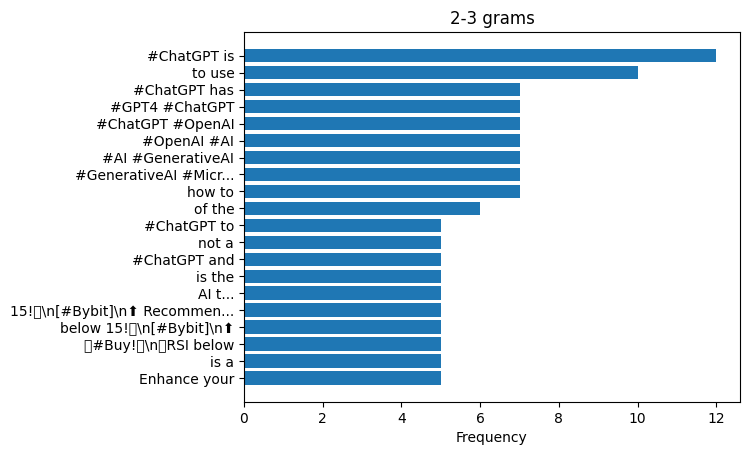

,first,second,frequencies,ratio
123,#ChatGPT,is,12,0.002784
633,to,use,10,0.002320
999,#ChatGPT,has,7,0.001624
976,#GPT4,#ChatGPT,7,0.001624
977,#ChatGPT,#OpenAI,7,0.001624
978,#OpenAI,#AI,7,0.001624
979,#AI,#GenerativeAI,7,0.001624
980,#GenerativeAI,#Micr...,7,0.001624
1138,how,to,7,0.001624
933,of,the,6,0.001392


In [46]:
create_plot(2)   # Create plot for bigram 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


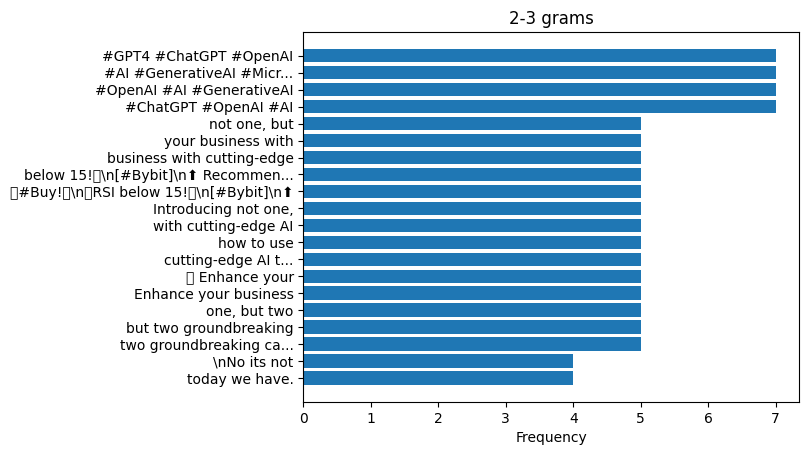

,first,second,third,frequencies,ratio
1007,#GPT4,#ChatGPT,#OpenAI,7,0.001624
1010,#AI,#GenerativeAI,#Micr...,7,0.001624
1009,#OpenAI,#AI,#GenerativeAI,7,0.001624
1008,#ChatGPT,#OpenAI,#AI,7,0.001624
304,not,"one,",but,5,0.001160
733,your,business,with,5,0.001160
734,business,with,cutting-edge,5,0.001160
1754,below,15!🔥\n[#Bybit]\n⬆,Recommen...,5,0.001160
1753,🔥#Buy!🔥\n🔥RSI,below,15!🔥\n[#Bybit]\n⬆,5,0.001160
303,Introducing,not,"one,",5,0.001160


In [47]:
 create_plot(3)   # Create plot for trigram

In [48]:

df["text"] = df["text"].astype(str)
df["text"] = [x.replace(':',' ') for x in df["text"]]

In [49]:
df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])

  0%|          | 0/500 [00:00<?, ?it/s]

In [50]:
words = df["clean_text"].values


In [51]:
ls = []

for i in words:
    ls.append(str(i))

In [52]:
ls[:5]

['get binanc spot recommend short ticker ghstusdt time interv min last price  rsi  power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa',
 'video show compani logo base websit domain short https tcoswognqbea get companylogo api chatgpt https tcovslbwtatfx',
 'use cerberusgpt hologeneticslab simul hologenet digitalorgan supercomput creat intern revis system chatgpt base organ process even system subject secur breach like prompt inject https tcoaaoxdvqt',
 'andr look chatgpt creat ad promot ai featur amp alleniverson https tcowvdthuwml',
 'sell binanc spot recommend short ticker farmbusd time interv min last price  rsi  power chatgpt farm farm gon na long wait short https tcoaebrdtaxz']

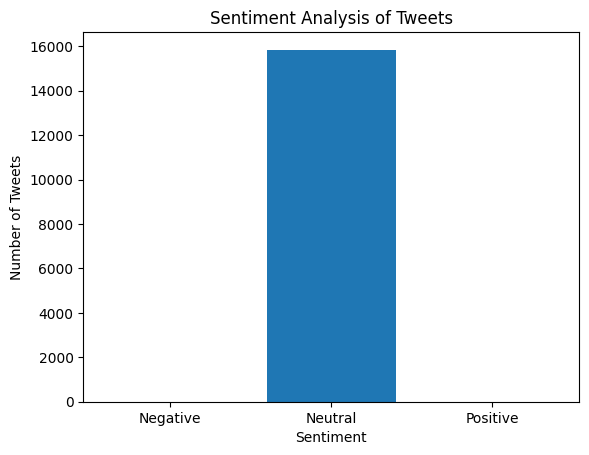

In [56]:

#TEXTBLOB ON STEMMING+LEMMA
from textblob import TextBlob
# Perform sentiment analysis on each tweet
polarity_scores = []
for text in cleaned_text:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    polarity_scores.append(polarity)

# Plot the sentiment scores as a bar chart
fig, ax = plt.subplots()
ax.bar(['Negative', 'Neutral', 'Positive'], [
       len(list(filter(lambda x: x < 0, polarity_scores))),
       len(list(filter(lambda x: x == 0, polarity_scores))),
       len(list(filter(lambda x: x > 0, polarity_scores)))
       ])
ax.set_title('Sentiment Analysis of Tweets')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Tweets')
plt.show()



In [57]:
def labels(sentences):
    dict={}
    for sentence in sentences:
        value=TextBlob(sentence).polarity
        if value >0:
            dict[sentence]="positive"
        elif value ==0:
            dict[sentence]="neutral"
        else:
            dict[sentence]="negative"
    return dict
        

In [58]:
ls2 = labels(ls)

In [59]:
Data= pd.DataFrame.from_dict(ls2, orient ='index')
Data

,0
get binanc spot recommend short ticker ghstusdt time interv min last price rsi power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa,negative
video show compani logo base websit domain short https tcoswognqbea get companylogo api chatgpt https tcovslbwtatfx,negative
use cerberusgpt hologeneticslab simul hologenet digitalorgan supercomput creat intern revis system chatgpt base organ process even system subject secur breach like prompt inject https tcoaaoxdvqt,negative
andr look chatgpt creat ad promot ai featur amp alleniverson https tcowvdthuwml,neutral
sell binanc spot recommend short ticker farmbusd time interv min last price rsi power chatgpt farm farm gon na long wait short https tcoaebrdtaxz,negative
...,...
amazon alexa head say compani forefront ai chatbot explod cnbc chatgpt ai openai https tcoxrmwgflqx,neutral
csgs like invest redditarmi trade yolo bottomfish stockstobuy news invest tothemoon daytrad stock stockstowatch option fomo chatgpt,neutral
chatgpt one step closer becom uberai openai gpt ruialv rnh medium https tcoghstscm,neutral
creator advanc chatbot chatgpt call us lawmak regul artifici intellig ai openai news technew https tcokltfxklup,neutral


In [60]:
Data.rename(columns ={0:"sentiment"})

,sentiment
get binanc spot recommend short ticker ghstusdt time interv min last price rsi power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa,negative
video show compani logo base websit domain short https tcoswognqbea get companylogo api chatgpt https tcovslbwtatfx,negative
use cerberusgpt hologeneticslab simul hologenet digitalorgan supercomput creat intern revis system chatgpt base organ process even system subject secur breach like prompt inject https tcoaaoxdvqt,negative
andr look chatgpt creat ad promot ai featur amp alleniverson https tcowvdthuwml,neutral
sell binanc spot recommend short ticker farmbusd time interv min last price rsi power chatgpt farm farm gon na long wait short https tcoaebrdtaxz,negative
...,...
amazon alexa head say compani forefront ai chatbot explod cnbc chatgpt ai openai https tcoxrmwgflqx,neutral
csgs like invest redditarmi trade yolo bottomfish stockstobuy news invest tothemoon daytrad stock stockstowatch option fomo chatgpt,neutral
chatgpt one step closer becom uberai openai gpt ruialv rnh medium https tcoghstscm,neutral
creator advanc chatbot chatgpt call us lawmak regul artifici intellig ai openai news technew https tcokltfxklup,neutral


Part 5

In [61]:
def sent_length(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_chars(text):
    return len(text)

def count_A(text):
    x = re.findall(r'a\w*', text)
    return len(x) 

def white_space(text):
    x = re.findall(r'\s', text)
    return len(x)

def count_mentions(text):
    x = re.findall(r'(@w[A-Za-z0-9]*)', text)
    return len(x)


def clean_text(text):
    _steps = [
    sent_length,
    count_words,
    count_chars,
    count_A,
    white_space,
    count_mentions,
    ]
    for step in _steps:
        text=step(text)
    return text   


Part6

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the preprocessed text
vectorizer.fit([cleaned_text])

# Transform the preprocessed text into a TF-IDF representation
tfidf = vectorizer.transform([cleaned_text])

# Convert the TF-IDF representation to an array
tfidf_array = tfidf.toarray()

print("TF-IDF representation shape:", tfidf_array.shape)
print("TF-IDF representation:\n", tfidf)


TF-IDF representation shape: (1, 1128)
TF-IDF representation:
   (0, 1127)	0.00412920069507667
  (0, 1126)	0.00412920069507667
  (0, 1125)	0.00412920069507667
  (0, 1124)	0.00825840139015334
  (0, 1123)	0.00412920069507667
  (0, 1122)	0.00825840139015334
  (0, 1121)	0.00412920069507667
  (0, 1120)	0.01238760208523001
  (0, 1119)	0.00412920069507667
  (0, 1118)	0.00412920069507667
  (0, 1117)	0.00412920069507667
  (0, 1116)	0.00412920069507667
  (0, 1115)	0.00412920069507667
  (0, 1114)	0.00412920069507667
  (0, 1113)	0.00412920069507667
  (0, 1112)	0.00412920069507667
  (0, 1111)	0.00412920069507667
  (0, 1110)	0.00412920069507667
  (0, 1109)	0.00412920069507667
  (0, 1108)	0.00825840139015334
  (0, 1107)	0.02890440486553669
  (0, 1106)	0.00412920069507667
  (0, 1105)	0.00412920069507667
  (0, 1104)	0.00412920069507667
  (0, 1103)	0.00825840139015334
  :	:
  (0, 24)	0.01651680278030668
  (0, 23)	0.33446525630121027
  (0, 22)	0.00412920069507667
  (0, 21)	0.00412920069507667
  (0, 20)	0

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the preprocessed text
vectorizer.fit_transform([cleaned_text])

# Get the vocabulary of the vectorizer
vocabulary = vectorizer.get_feature_names_out()

# Transform the preprocessed text into a BOW representation
bow = vectorizer.transform([cleaned_text])

# Convert the BOW representation to an array
bow_array = bow.toarray()

print("Vocabulary size:", len(vocabulary))
print("BOW representation shape:", bow_array.shape)
print("BOW representation:\n", bow_array)

Vocabulary size: 1128
BOW representation shape: (1, 1128)
BOW representation:
 [[2 1 1 ... 1 1 1]]


In [64]:
#nltk.download('abc')
#nltk.download('punkt')